# Numpy e Arrays multidimensionais

Nesse notebook estudaremos o que são arrays multidimensionais e como utilizá-los em Python, em especial usando a biblioteca Numpy.

Ao final desse notebook, você será capaz de:

* Entender a importância dos arrays e suas principais propriedades.
* Criar arrays explicitamente e utilizando geradores.
* Acessá-los e atribuir novos valores diretamente, por slicing ou máscaras booleanas.
* Conhecer e aplicar as principais funções matemáticas e lógicas em arrays.
* Saber utilizar arrays para responder perguntas sobre seus dados.
* Entender o papel e os fundamentos de uma regressão linear.


In [276]:
import utils
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Por que eu usaria numpy?

Vamos resolver alguns pequenos problemas sem usar vetorização e depois compararemos com uma solução vetorizada para entender a diferença.

Vamos começar com um bem fácil. Crie uma lista com o valor absoluto de cada elemento dessa lista:

In [280]:
values = [-3,10,0,-15,-6]

In [282]:
abs_values = []
for v in values:
    abs_values.append(abs(v))
    
abs_values

[3, 10, 0, 15, 6]

Em numpy ficaria assim:

In [283]:
np.abs(values)

array([ 3, 10,  0, 15,  6])

Imagine que você é responsável pelo estoque de uma distribuidora e precise calcular o preço de toda a conta:

In [289]:
nitems = np.array([101, 42, 18, 12, 5, 134])  # quantidade de itens comprados
prices = np.array([12.2, 3.9, 15.0, 2.75, 1.1, 0.99])  # preço de cada item

In [291]:
cost = []
for i in range(len(nitems)):
    cost.append(nitems[i]*prices[i])

cost

[1232.1999999999998, 163.79999999999998, 270.0, 33.0, 5.5, 132.66]

In [292]:
np.sum(nitems*prices)

1837.1599999999999

## Arrays

Podemos definir arrays chamando `np.array()` passando listas...

In [293]:
a = np.array([1,2,3,4,5])
a

array([1, 2, 3, 4, 5])

ou com tuplas também:

In [294]:
a = np.array((10,20,30,40))
a

array([10, 20, 30, 40])

E podemos usar múltiplas

In [295]:
a = np.array([[1,2,3], [3,2,1]])
a

array([[1, 2, 3],
       [3, 2, 1]])

Experimente com o método e crie alguns arrays:

In [298]:
np.array([[1,2,3], 
          [3,2,1],
          [0,0,0]])

array([[1, 2, 3],
       [3, 2, 1],
       [0, 0, 0]])

### Algumas propriedades importantes

Número de dimensões ou rank de um array: 

* Calendário: 2 dimensões
* Gastos com alimentação todo mês: 1 dimensão
* Jogo da velha: 2 dimensões

In [299]:
a.ndim

2

Dimensões ou shape:
* Calendário: 5 x 7 (variável)
* Gastos com alimentação todo mês: 12
* Jogo da velha: 3 x 3
* Sudoku: 9 x 9

In [300]:
a.shape

(2, 3)

O tipo de valor que está armazenado em cada posição:

In [301]:
a.dtype

dtype('int64')

### Exercícios rápidos!

Quais as dimensões de cada um desses arrays?

In [302]:
np.array([[ 0.4519243 ,  0.17657074,  0.82173731,  0.73718558],
          [ 0.37762179,  0.09939027,  0.84810815,  0.57109009]])

array([[ 0.4519243 ,  0.17657074,  0.82173731,  0.73718558],
       [ 0.37762179,  0.09939027,  0.84810815,  0.57109009]])

In [303]:
np.array([9, 1, 8, 5, 0, 8, 1, 5, 6, 3])

array([9, 1, 8, 5, 0, 8, 1, 5, 6, 3])

In [304]:
np.array([[[ 0,  1,  2],
           [ 3,  4,  5],
           [ 6,  7,  8]],
   
          [[ 9, 10, 11],
           [12, 13, 14],
           [15, 16, 17]],
   
          [[18, 19, 20],
           [21, 22, 23],
           [24, 25, 26]]])

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

## Controlando o tipo

Por padrão o numpy vai definir o tipo que mais faz sentido:

In [ ]:
a = np.array([1, 2, 3])

print(a.dtype)

Porém podemos controlar o tipo durante a criação do array:

In [ ]:
np.array([200, 121, 399], dtype=np.int16)

É clara a diferença entre um `int` e um `float`? E um `int16` e um `int64`?

## Arrays vs lists

Listas podem conter objetos de diferentes tipos:

In [305]:
lst = [1, 1., 'one', int]

for item in lst:
    print(item, type(item))

1 <class 'int'>
1.0 <class 'float'>
one <class 'str'>
<class 'int'> <class 'type'>


Já arrays podem ter somente objetos de um mesmo tipo, geralmente tipos numéricos:

In [311]:
a = np.array([1.0, 2, 3, 4, 5, 'seis'])
a

array(['1.0', '2', '3', '4', '5', 'seis'],
      dtype='<U32')

In [312]:
a.dtype

dtype('<U32')

Numpy sempre tenta inferir o tipo que você quer usar e converte todos elementos para esse tipo (optando pelo tipo mais flexível).

Listas suportam quaiquer dimensões:

In [313]:
matriz_py = [[1,2,3], ['one', 'two'], [1., 2., 3., 4., 5., 6.], ['one', 2, 3.0]]
matriz_py

[[1, 2, 3], ['one', 'two'], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0], ['one', 2, 3.0]]

Já um array requer que cada linha tenha o mesmo tamanho para formar uma matriz completa:

In [314]:
matrix_np = np.array([[1,2,3], [10,20,30]])
print(matrix_np.shape)
print(matrix_np.dtype)
matrix_np

(2, 3)
int64


array([[ 1,  2,  3],
       [10, 20, 30]])

## Geradores

Dadas certas dimensões, numpy oferece alguns construtores/geradores de arrays úteis:

Array de 1's:

In [316]:
np.ones((3,4))

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

Array of 0's:

In [318]:
np.zeros((2,10), dtype=np.int64)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

Valores aleatórios:

In [319]:
np.random.random((6,4))

array([[ 0.07884976,  0.17334338,  0.79821238,  0.38617709],
       [ 0.93149043,  0.38344736,  0.33613146,  0.05712748],
       [ 0.70004683,  0.11895914,  0.92735089,  0.26810136],
       [ 0.22232223,  0.75923742,  0.12272317,  0.07354925],
       [ 0.45618497,  0.60038655,  0.0648545 ,  0.31298959],
       [ 0.84410287,  0.47275102,  0.78181498,  0.391842  ]])

In [321]:
np.random.randint(1, 5, 10)

array([1, 4, 1, 4, 3, 2, 2, 2, 2, 1])

Valores em sequência:

In [325]:
np.arange(10, 25, 5)

array([10, 15, 20])

In [323]:
# list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Valores igualmente espaçados:

In [326]:
np.linspace(0,2,9)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ])

### Exercícios!

Crie uma matriz com 5 colunas e 3 linhas de valores aleatórios

In [327]:
np.random.random((3,5))

array([[ 0.63027893,  0.65301373,  0.36324844,  0.52512519,  0.72730248],
       [ 0.88143404,  0.93510342,  0.49194201,  0.13680925,  0.91315783],
       [ 0.25066771,  0.24877828,  0.94824465,  0.32806482,  0.50542177]])

Crie um array começando em 2 e indo até 10 em incrementos de 0.5

In [330]:
# np.arange(2, 10.5, 0.5)
np.linspace(2, 10, 17)

array([  2. ,   2.5,   3. ,   3.5,   4. ,   4.5,   5. ,   5.5,   6. ,
         6.5,   7. ,   7.5,   8. ,   8.5,   9. ,   9.5,  10. ])

## Indexação e Atribuições

Numpy oferece múltiplas formas de acessar (indexar) e atribuir seus elementos:

Para acessar o i-ésimo elemento de um array, basta fazer `a[i]`:

In [331]:
a = np.array([0,10,20,30,40,50])
a

array([ 0, 10, 20, 30, 40, 50])

In [336]:
# a[len(a)]

Da mesma forma, quando temos mais dimensões, para acessar o elemento na linha `i` e coluna `j`, basta fazer `a[i,j]`:

In [338]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [341]:
a[0,2]

3

Você pode fazer atribuições normalmente:

In [342]:
z = np.zeros(10, dtype=int)
z

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [343]:
z[4] = 1
z

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

### Slicing

Slicing é uma sintaxe que te permite indexar intervalos e acessar para acessar subarrays (fatias) de arrays.

In [344]:
m = np.random.random((10,5))
m

array([[ 0.09901513,  0.71681289,  0.1073562 ,  0.63460684,  0.03468704],
       [ 0.75213004,  0.39386036,  0.47734703,  0.62201734,  0.35021222],
       [ 0.10858331,  0.1102255 ,  0.7348407 ,  0.79542031,  0.19529282],
       [ 0.26689229,  0.93043471,  0.74906203,  0.99230538,  0.01112612],
       [ 0.29921369,  0.75999946,  0.66378894,  0.98758485,  0.63546981],
       [ 0.85563514,  0.18441402,  0.66590187,  0.20641818,  0.04951085],
       [ 0.97229892,  0.32734578,  0.79949908,  0.27286254,  0.96250156],
       [ 0.58660953,  0.7767784 ,  0.82456062,  0.32266353,  0.18968645],
       [ 0.63244527,  0.34876114,  0.35005196,  0.68555261,  0.56615862],
       [ 0.68979407,  0.04950069,  0.90212255,  0.11056815,  0.21502593]])

Para acessar as 3 primeiras linhas e as 2 últimas colunas:

In [347]:
m[0:3]

array([[ 0.09901513,  0.71681289,  0.1073562 ,  0.63460684,  0.03468704],
       [ 0.75213004,  0.39386036,  0.47734703,  0.62201734,  0.35021222],
       [ 0.10858331,  0.1102255 ,  0.7348407 ,  0.79542031,  0.19529282]])

Você pode ignorar um dos limites:

In [349]:
m[:, 4:5]

array([[ 0.03468704],
       [ 0.35021222],
       [ 0.19529282],
       [ 0.01112612],
       [ 0.63546981],
       [ 0.04951085],
       [ 0.96250156],
       [ 0.18968645],
       [ 0.56615862],
       [ 0.21502593]])

Ou pode usar índices negativos:

In [350]:
m[:3, -2:]

array([[ 0.63460684,  0.03468704],
       [ 0.62201734,  0.35021222],
       [ 0.79542031,  0.19529282]])

Você pode combinar slicing com índices diretos:

In [353]:
m[0, :3]

array([ 0.09901513,  0.71681289,  0.1073562 ])

Lembre-se que isso vai sempre reduzir o rank (número de dimensões) de seu array em 1 para cada acesso de índice direto:

In [ ]:
print(m.ndim)
print(m[0].ndim)
print(m[:2, 0].ndim)
print(m[0,0].ndim)

In [ ]:
print(m.shape)
print(m[0].shape)
print(m[:2, 0].shape)
print(m[0,0].shape)

Podemos fazer atribuições em slicings também:

In [354]:
m = np.random.random((3,3))
m

array([[ 0.46288182,  0.91617732,  0.628314  ],
       [ 0.49984597,  0.27548488,  0.26158624],
       [ 0.51370966,  0.87024136,  0.61331796]])

In [355]:
m[1,:] = 0
m

array([[ 0.46288182,  0.91617732,  0.628314  ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.51370966,  0.87024136,  0.61331796]])

Se as dimensões baterem, podemos atribuir um array em um slice de outro array:

In [356]:
m = np.zeros((4,5))
m

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [357]:
m[1] = [1,2,3,4,5]
m

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 1.,  2.,  3.,  4.,  5.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [358]:
m[:,-1] = np.ones(4)
m

array([[ 0.,  0.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  1.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.]])

### Exercícios:

Crie um array 2D com 4 linhas e 5 colunas de 0's, porém com a coluna central de 1's

In [371]:
a = np.zeros((16,5))
a[:, 2] = np.ones(len(a))
a

array([[ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.]])

Crie a matrix identidade 3x3

In [364]:
a = np.zeros((3,3))

a[0,0] = 1
a[1,1] = 1
a[2,2] = 1
a

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  0.]])

In [366]:
# np.identity(3)

### Acesso com booleanos e listas

Podemos também acessar múltiplos elementos definidos por uma lista:

In [376]:
a = np.arange(20).reshape(5,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [377]:
a[[0,2,3]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [378]:
a[:,[0,-1]]

array([[ 0,  3],
       [ 4,  7],
       [ 8, 11],
       [12, 15],
       [16, 19]])

Podemos também usar arrays de booleanos com o mesmo shape que o array sendo acessado. Um valor `True` indica que o valor correspondente daquela célula deve ser acessado:

In [382]:
a[[True, False, True, True, False]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [383]:
a[:, [True, False, True, False]]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10],
       [12, 14],
       [16, 18]])

### Exercícios

Retorne todas as linhas ímpares de `a`:

In [386]:
a = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
              [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
              [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
              [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
              [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]])

In [391]:
a[np.arange(1, len(a), 2)]

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]])

E se o array `a` possui 100 linhas, sua solução ainda funciona bem?

Sim :)

Dado o array abaixo, o que é retornado por `a[[True, False, False, False, True], [1,3]]`? (pense antes de rodar)

In [397]:
a = np.arange(20).reshape(5,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [399]:
a[[0,2], [1,3]]

array([ 1, 11])

Essa forma de acesso parece estranha a primeira vista, porém é uma das mais comuns quando estamos trabalhando com modelagem. Veremos por que em breve!

#### Lembretes importantes sobre slicing:

* Se você ignorar um dos limites, ele considera todo o restante
* O limite inferior é inclusivo, já o limite superior é exclusive
* Você pode usar índices negativos
* Diferente da indexação direta, índices inválidos vão retornar um array vazio, e não um erro
* Slincing e acessos diretos podem ser combinados, porém lembre-se que seu array perde dimensões com cada acesso

## Operações matemáticas com arrays

Provavelmente a ferramenta mais poderosa de numpy é poder fazer operações matemáticas com arrays. Numpy suporta todas operações tradicionais e muitas outras. 

A maioria das operações que fazemos é elemento por elemento (element-wise), ou seja, se `C = A + B`, temos que `A.shape == B.shape == C.shape` e para todo `i,j` temos que `C[i,j] = A[i,j] + B[i,j]`

In [400]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)
z = np.ones((2,2))

In [407]:
x

array([[ 1.,  2.],
       [ 3.,  4.]])

In [408]:
y

array([[ 5.,  6.],
       [ 7.,  8.]])

In [406]:
z

array([[ 1.,  1.],
       [ 1.,  1.]])

In [409]:
# 1+2
x+y

array([[  6.,   8.],
       [ 10.,  12.]])

In [410]:
(x+y)*z

array([[  6.,   8.],
       [ 10.,  12.]])

Como sempre, existem outras formas de operar arrays

In [411]:
np.add(x, y)
np.subtract(x, y)
np.multiply(x, y)
np.divide(x, y)

array([[ 0.2       ,  0.33333333],
       [ 0.42857143,  0.5       ]])

Podemos operar com escalar e array também, onde o escalar é aplicado em cada elemento do array:

In [413]:
(2*x + y/2)*z

array([[  4.5,   7. ],
       [  9.5,  12. ]])

E quaisquer combinações com essas operações:

Numpy disponibiliza várias operações de comparação também:

In [417]:
a = np.array([-3, 7, 3, 23])
b = np.array([0, 2, 10, -1])
c = np.array([1, 13, 0, 8])

np.maximum(a, b)
np.minimum(a, b)

array([ 0,  7, 10, 23])

### Operações lógicas 

Além das operações matemáticas, operações lógicas em arrays são também muito comuns:

In [419]:
a>b

array([False,  True, False,  True], dtype=bool)

In [420]:
(b>a) & (b<c)

array([ True, False, False, False], dtype=bool)

In [421]:
(b>a) | (b>c)

array([ True, False,  True, False], dtype=bool)

Elas são úteis para contar valores que tornam uma condição verdade (pois numpy considera True=1 e False=0):

In [422]:
np.sum(a>b)

2

E também são excepcionalmente úteis para indexação e atribuição:

In [424]:
# a>5
a[a>5]

array([ 7, 23])

## Exercícios

Quantos elementos de `a` estão entre 40 e 60?

In [427]:
a = np.array([[17, 18, 34, 78, 65],
              [26, 92, 48, 56,  6],
              [19, 41, 97, 52, 43],
              [62, 49, 74, 97,  5],
              [65, 93,  3, 15, 22]])

In [433]:
np.sum((a>40) & (a<60))

6

Divida o array a em b e c, onde b tem as linhas que começam com valores menores que 5 e b as linhas que começam com valores maiores ou iguais a 5:

In [434]:
a = np.random.randint(1, 10, 90).reshape(15,6)
a

array([[5, 2, 6, 7, 7, 6],
       [8, 3, 5, 8, 3, 7],
       [1, 2, 9, 9, 5, 3],
       [5, 2, 4, 9, 8, 4],
       [2, 6, 6, 2, 8, 7],
       [4, 2, 8, 8, 1, 2],
       [8, 2, 6, 5, 4, 8],
       [5, 4, 3, 7, 9, 3],
       [5, 8, 9, 1, 2, 9],
       [1, 4, 1, 9, 3, 1],
       [2, 5, 7, 5, 5, 8],
       [9, 1, 1, 5, 5, 5],
       [2, 6, 2, 7, 9, 5],
       [6, 4, 5, 6, 1, 9],
       [4, 9, 5, 2, 3, 9]])

In [438]:
treino = a[a[:,0]<5]
teste = a[a[:,0]>=5]
teste

array([[5, 2, 6, 7, 7, 6],
       [8, 3, 5, 8, 3, 7],
       [5, 2, 4, 9, 8, 4],
       [8, 2, 6, 5, 4, 8],
       [5, 4, 3, 7, 9, 3],
       [5, 8, 9, 1, 2, 9],
       [9, 1, 1, 5, 5, 5],
       [6, 4, 5, 6, 1, 9]])

## Views vs Copy

Antes de continuarmos vale a pena falar um pouco sobre cópias e visões!

Numpy evita de fazer cópias desnecessárias dos dados. Por um lado isso é eficiente, por outro lado é fácil cometer erros:

In [444]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [445]:
v = a[:,1:3]
v

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10]])

`v` é uma view de `a` (uma parte de `a`), não é uma cópia!

In [446]:
v[:] = 100
v

array([[100, 100],
       [100, 100],
       [100, 100]])

In [447]:
a

array([[  0, 100, 100,   3],
       [  4, 100, 100,   7],
       [  8, 100, 100,  11]])

Para resolver isso, você pode usar o método `copy` (mas só se precisar mesmo):

In [449]:
a = np.arange(12).reshape(3,4)

c = a[:,1:3].copy()
c

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10]])

Agora `c` é uma cópia de `a`:

In [450]:
c[:] = 100
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

## Usando imagens para explorar arrays

In [451]:
from matplotlib.image import imread
from matplotlib.pyplot import imshow

def imshowg(img):
    imshow(img, cmap='gray')

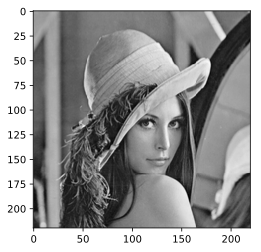

In [452]:
img = imread('../data/lenna-gray.png')
imshowg(img)

Investigando um pouco mais o que é uma imagem, vemos que é apenas um array de duas dimensões:

In [453]:
print(img.shape)
print(img.dtype)

(220, 220)
float32


Podemos manipular como quisermos os valores da imagem:

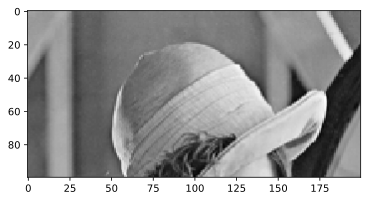

In [456]:
imshowg(img[:100,:200])

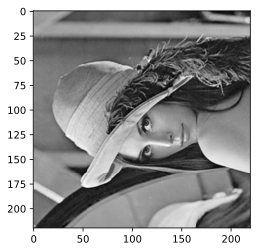

In [457]:
imshowg(img.T)

## Exercícios

Faça um close dramático nos olhos de Lenna!!

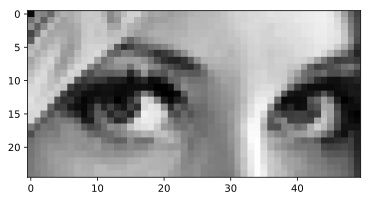

In [463]:
imshowg(img[100:125, 100:150])

Lenna não quer ser identificada. Coloque uma tarja preja em seus belíssimos olhos.

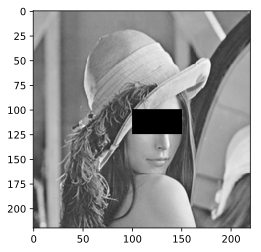

In [464]:
i = img.copy()
i[100:125, 100:150] = 0
imshowg(i)

Lenna quer ser uma estrela de cinema. Faça sua imagem parecer um tela widescreen (tarjas pretas inferiores e superiores)

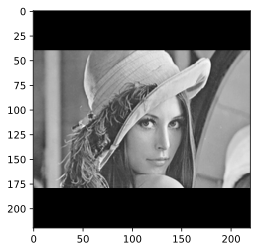

In [466]:
i = img.copy()
i[:40, :] = 0
i[-40:, :] = 0

imshowg(i)

## Funções

Bumpy oferece várias funções matemáticas clássicas e todas funções implementadas estão sobrecarregadas (?) para operar em arrays, elemento a elemento:

In [468]:
a = np.array([2, 4, 1, 16])
a

array([ 2,  4,  1, 16])

In [472]:
# print(np.log2(a))
# print(np.sqrt(a))
print(np.power(a, 2))

[  4  16   1 256]


In [473]:
f = np.array([1.3, 5.6, 100.101, 0.24])
f

array([   1.3  ,    5.6  ,  100.101,    0.24 ])

In [475]:
print(np.ceil(f).astype(int))
print(np.floor(f))

[  2   6 101   1]
[   1.    5.  100.    0.]


## Plotting

Vamos aprender o básico do básico de Matplotlib para poder visualizar algumas das nossas análises. O principal método da biblioteca é o `plt.plot(x, y)`, onde x são os valores do eixo x, e y os valores correspondentes do eixo y.

In [477]:
import matplotlib.pyplot as plt

Se quisermos plotar os pontos (1,1), (2,2) e (3,3) com diferentes tipos de plot:

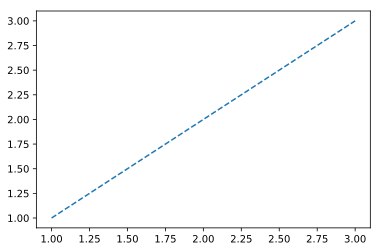

In [481]:
plt.plot([1,2,3], [1,2,3], '--')

É bem simples, como vimos, só lembre-se que cada eixo fica em um array separado, ao invés de passarmos os pontos juntos:

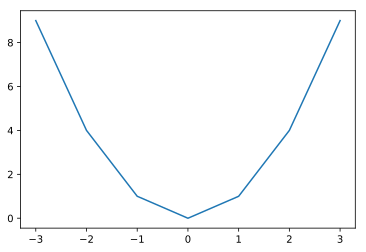

In [486]:
x = np.array([-3,-2,-1,-0,1,2,3])
plt.plot(x, x**2)
# plt.plot(x, 2*x)

Nosso plot parece meio quadradão :/ 

Podemos combinar os geradores de arrays com as funções numpy para plotar mais pontos e visualizar diferentes funções:

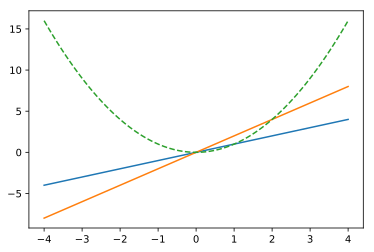

In [491]:
x = np.linspace(-4, 4, 100)
plt.plot(x, x)
plt.plot(x, 2*x)
plt.plot(x, x**2, '--')

Matplolib é extremamente customizável, mas teremos tempo pra 

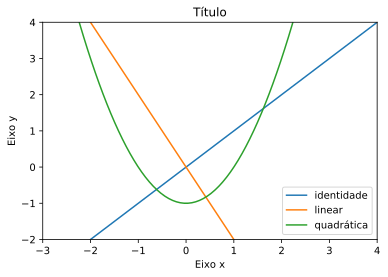

In [490]:
x = np.linspace(-4,4,100)
plt.plot(x, x, label='identidade')
plt.plot(x, -2*x, label='linear')
plt.plot(x, x**2-1, label='quadrática')
plt.title('Título')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.xlim((-3,4))
plt.ylim((-2,4))
plt.legend()

### Exercícios

Calcule a distancia absoluta (arredondando para inteiros) entre cada elemento de A para cada elemento de B: 

In [492]:
np.array([1.2, 6.7]).astype(int)

array([1, 6])

In [494]:
a = np.array([[ 2.24076221,  6.94465659,  8.1025218 ],
              [ 2.5315115 ,  5.11973604,  4.47462266]])
b = np.array([[ 0.05494317,  5.85191288,  1.74149864],
              [ 9.24855539,  7.85211148,  8.7456627 ]])

In [495]:
np.abs(a-b).astype(int)

array([[2, 1, 6],
       [6, 2, 4]])

Existe um resultado interessante da trigonometria diz que, para qualquer valor x, temos que $\sin(x)^2 + \cos(x)^2 = 1$.
Verifique se isso é verdade para pelo menos 30 valores aleatórios.

In [502]:
a = np.random.random(30)
np.allclose(np.sin(a)**2 + np.cos(a)**2, 1)

True

## Agregações

Numpy oferece funções que agregam múltiplos valores em um único valor, como `sum` e `mean`:

In [504]:
a = np.arange(10)
# a

print(' sum:', a.sum())
print(' min:', a.min())
print(' max:', a.max())
print(' cum:', a.cumsum())
print('mean:', a.mean())
print(' std: ', a.std())

 sum: 45
 min: 0
 max: 9
 cum: [ 0  1  3  6 10 15 21 28 36 45]
mean: 4.5
 std:  2.87228132327


Notem como é possível chamar tanto `np.func(a)`, ou `a.func()`.

Quando temos mais de uma dimensão podemos fazer agregações em dimensões específicas usando o argumento axis:

In [505]:
m = np.arange(12).reshape(3,4)
m

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [515]:
np.sum(m, axis=0)

array([12, 15, 18, 21])

<img src="sum-axis.png">

Muitos métodos oferecem um opção `arg`, que ao invés de retornar o valor, retorna o índice:

In [519]:
a = np.array([4, 8, 8, 2, 5, 6, 0])
np.where(np.max(a)==a)
# a.argmax()

(array([1, 2]),)

In [ ]:
np.argsort(a)

Esses métodos são importantes pois muitas vezes queremos saber qual é o maior elemento, e não o valor do maior elemento.

## Voltemos à Lenna, agora com cores!!

Como você acha que a representação deveria ser para podermos ter cor?

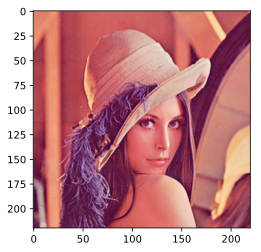

In [520]:
img = imread('../data/lenna.png')
imshow(img)

In [521]:
img.shape

(220, 220, 3)

### Exercícios

Como seria essa imagem sem nenhum tom verde? Coloque 0 no canal verde e plote a imagem:

In [525]:
i = img.copy()
i[:, :, 1] = 0
# imshow(i)

Qual é a cor predominante dessa imagem? Mostre com números :)

In [524]:
img.sum(axis=0).sum(axis=0)

array([ 34207.30078125,  18800.82617188,  20007.4609375 ], dtype=float32)

Transforme essa imagem em uma imagem preto e branco! Como você acha que podemos fazer isso?

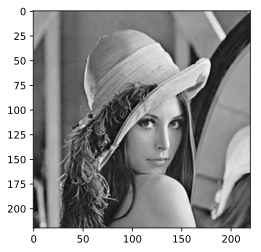

In [527]:
imshowg(img.mean(axis=2))

## Case: Alturas dos pais e filhos

Vamos dar uma investigada em um dataset clássico de alturas. A principal pergunta que queremos responder é se **existe alguma correlação entre a altura dos pais e de seus filhos?**

In [535]:
heights = 2.54*utils.load_heights()

A primeira coluna contém as alturas dos pais e a segunda dos filhos. Porém as alturas estão em polegadas, mas **queremos elas em centímetros**. Além disso, para facilitar algumas análises, vamos criar um vetor 1D para os filhos e um para os pais:

In [537]:
p = heights[:, 0]
f = heights[:, 1]

Agora queremos responder algumas perguntas básicas primeiro:

* Quantos amostras/instâncias/exemplos temos na nossa base?
* Qual o índice do filho mais baixo e do pai mais alto?
* Qual a probabilidade de um filho ser mais alto que seu pai?
* Estamos ficando mais altos ou mais baixos com o tempo?

In [588]:
print('instancias:', len(f))
print('filho mais baixo:', np.argmin(f))
print('pai mais alto:', np.argmax(p))
print('probabilidade:', (f>p).mean())

instancias: 1078
filho mais baixo: 422
pai mais alto: 157
probabilidade: 0.628942486085


Agora vamos **plotar nossos pontos** usando matplotlib:

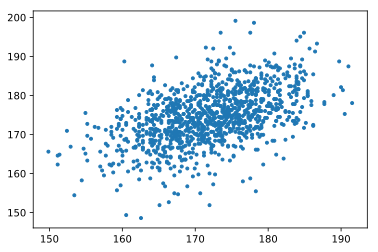

In [589]:
plt.plot(p, f, '.')

O que você acha da correlação? Se você tivesse que advinhar a altura do filho de uma pessoa com 160cm, qual seria seu melhor palpite?

Talvez 165cm?

Essa reta imaginária que visualizamos é um modelo que recebe a altura do pai e preve a altura do filho. Esse modelo pode ser visto como uma função `f(x) = y`, onde x é a altura do pai e y é a altura do filho.

Vocês conseguem definir essa função?

In [904]:
def predict(p):
    return 0.8*p + 35

Vamos revistar nossa resposta anterior usando nossa nova função:

In [591]:
predict(160)

163.0

Porém nós achamos essa reta no olhão O.O Se usarmos um número ligeiramente diferente, como podemos saber se a reta é melhor ou pior que outras que tentamos? Vamos definir nossa função de erro, que vai contabilizar todos nossos erros:

In [597]:
def error(y, yp):
    return np.abs(y-yp).mean()

In [598]:
error(f, pf)

5.3191198515769935

5.31911985158


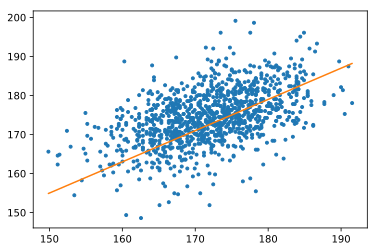

In [905]:
pf = predict(p)

print(np.abs(pf-f).mean())
plt.plot(p, f, '.')
plt.plot(p, pf)

Agora vamos comparar nossos resultados com os do sklearn. Aposto que os nossos são melhores!

In [585]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(p.reshape(-1,1), f)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [586]:
lr.predict([[160]])

array([ 168.32865938])

In [901]:
print(lr.coef_[0], lr.intercept_)

0.514005912546 86.0877133733


Tente substituir esses valores na nossa função predict e plotar a reta. Ela parece fazer sentido?

# Exercícios Pós-aula

Imagine que existem vários armazéns diferentes para se fazer uma compra (`warehouse_locs`) e você gostaria de saber **qual é o mais próximo da sua distribuidora** (`your_loc`). Considere que as localizações são coordenadas do quarteirão de cada armazém (e também da sua distribuidora) e que os quarteirões são perfeitamente quadrados. Ou seja, o seu armazém em `(2,5)` está a 5 quarteirões de distância do armazém em `(1,0)`.

Como bonus, tente fazer esse exercício em  python puro!

In [ ]:
your_loc = (2,5)
warehouse_locs = [(1,0), (2,4), (7,2), (0,5)]

Em python, uma solução possível é seria:

In [601]:
def closest_warehouse(your_loc, warehouse_locs):
    mx, my = your_loc

    best_wh = None
    min_d = 100
    dists = []
    for i, (x, y) in enumerate(warehouse_locs):
        d = abs(mx-x) + abs(my-y)
        if d<min_d:
            best_wh = i
            min_d = d

    return best_wh

In [603]:
print('Posição na lista do armazém mais próximo:', closest_warehouse(your_loc, warehouse_locs))

Posição na lista do armazém mais próximo: 1


Em numpy ficaria assim:

In [605]:
your_loc = np.array((2,5))
warehouse_locs = np.array([(1,0), (2,4), (7,2), (0,5)])

In [607]:
def closest_warehouse_np(your_loc, warehouse_locs):
    return np.abs((your_loc - warehouse_locs)).sum(axis=1).argmin()

In [608]:
print('Python: posição na lista do armazém mais próximo = ', closest_warehouse(your_loc, warehouse_locs))
print('NumPy: posição na lista do armazém mais próximo = ', closest_warehouse_np(your_loc, warehouse_locs))

Python: posição na lista do armazém mais próximo =  1
NumPy: posição na lista do armazém mais próximo =  1


### Exercício

Voltando ao nosso exemplos das compras, qual é o item mais custoso na nossa compra?

In [610]:
items =  np.array(['queijo minas', 'rúcula', 'palmito', 'molho de tomate', 'chuchu', 'sacola 10x'])
nitems = np.array([11,   32,   9,   12,   5,  134])
prices = np.array([12.2, 3.9, 15.0, 2.75, 1.99, 0.99])

In [613]:
items[np.argmax(nitems*prices)]

'palmito'

Agora imprima todos os itens dos mais caros para os mais baratos:

In [623]:
items[np.argsort(nitems*prices)[::-1]]

array(['palmito', 'queijo minas', 'sacola 10x', 'rúcula',
       'molho de tomate', 'chuchu'],
      dtype='<U15')

Note no uso de `::-1` para iterar inversamente em um array. Não falamos sobre esse recurso pois torna as coisas mais confusas para quem ainda está dominando a indexação com numpy, mas é ocasionalmente útil. Confira o material de pós-aula para um tutorial mais completo em indexação.

### Exercícios

A raiz do erro quadrático médio (RMSE) é uma métrica comum para medir a precisão de um regressor. Se os valores que você queria prever estão no array $Y$, e os valores de fato preditos estão no array $Y^p$, o RMSE das suas predições é definido como $\sqrt{\frac{1}{n} \sum_{i=1}^{n}{{(Y_i - Y^p_i)}^2}}$

Dados Y e Yp, calcule o RMSE : 

In [625]:
Y = np.array([1.67, 1.78, 1.57, 1.50, 2.01])
Yp = np.array([1.51, 1.72, 1.81, 1.41, 1.91])

In [628]:
np.sqrt(((Y-Yp)**2).mean())

0.14484474446799922

Um outlier é um valor anormalmente maior ou menor que os outros valores de uma mesma variável (array). Eles costumam atrapalhar análises e métodos estatísticos por serem uma anomalia. Vamos definirmos um outlier como qualquer valor da variável X que esteja distante da média de X por mais de 3 vezes o desvio padrão de X. Liste os outliers da variável abaixo:

In [631]:
a = np.array([-16.6, -145.72, 66.36, -197.01, -118.13, 133.02, 117.31, 83.64, 103.38, 
              61.06, 129.33, -85.02, -202.67, 86.2, -66.51, -40.59, 39.86, 24.75, 15.58, 
              3023.3, 59.52, -89.94, 61.73, -55.74, -31.21, -150.92, 122.08, 44.03, 6.66, 
              129.76, -105.09, 113.48, -178.97, -71.71, -66.32, 55.31, 41.04, 107.6, 81.87, 
              2430.6, -140.71, -98.84, 52.57, 3.2, 22.77, -81.76, -49.85, 162.47, 167.89, 75.32])

In [634]:
outliers_mask = np.abs(a-a.mean())>3*a.std()
a[outliers_mask]

array([ 3023.3,  2430.6])

## Case: Canceres benignos e malignos

Vamos trabalhar com um dataset famoso que contém medidas clínicas de diferentes tumores diagnosticados. Cada linha representa um tumor que eventualmente foi diagnosticado como benigno ou maligno. Vamos tentar responder algumas perguntas sobre esses dados.

* Quantos tumores temos no dataset? Quantas medidas pra cada tumor? E qual a porcentagem de benígnos?
* Queremos ter uma idéia dos dados que estamos trabalhando. Calcule a média, desvio padrão, mínimo, máximo de cada atributo/variável (aqui você pode usar um for para iterar nos atributos).
* Existem outliers nesse dataset? Conte o número de outliers de cada variável. Escolha uma variável com outliers (de preferência a que mais tem) e limite esses valores em um intervalo razoável para evitar que esses valores afetem nossa regressão.
* As variáveis assumem intervalos muito diferentes, portanto queremos normalizá-as. Faça com que cada variável esteja limitada entre 0 e 1 (basta subtrair cada elemento pelo menor valor e dividir pelo maior valor).
* Se você pudesse usar somente uma variável para identificar se um tumor é maligno ou benigno, como você encontraria a mais informativa? Qual valor de corte você usaria?

In [814]:
features, values, is_benign = utils.load_cancer()

Esses exercícios são um pouco mais difíceis, mas são bem próximos das tarefas do dia-a-dia de um cientista de dados. Case não entenda alguma solução, separe e inspecione as várias partes do comando e tente entender cada uma delas individualmente.

Quantos tumores temos no dataset? Quantas medidas/features/atributos temos pra cada tumor? E qual a porcentagem de benígnos?

In [815]:
print('#tumores:', len(values))
print('#medidas:', len(features))
print('% benignos:', is_benign.mean())

#tumores: 569
#medidas: 30
% benignos: 0.627416520211


Queremos ter uma idéia dos dados que estamos trabalhando. Calcule a média, desvio padrão, mínimo, máximo de cada atributo/variável (aqui você pode usar um for para iterar nos atributos).

In [816]:
for i in range(len(features)):
    feature_values = values[i]
    print(features[i], 
          feature_values.mean(), 
          feature_values.std(), 
          feature_values.min(), 
          feature_values.max())

mean radius 118.872615733 397.01313121 0.006193 2019.0
mean texture 124.6974489 415.051008087 0.003532 1956.0
mean perimeter 112.913085033 366.809508876 0.004571 1709.0
mean area 41.3333949333 120.847597162 0.00911 567.7
mean smoothness 111.222807167 357.933365406 0.005115 1575.0
mean compactness 50.1848434 155.08059187 0.005082 741.6
mean concavity 102.264578767 336.145184539 0.002179 1606.0
mean concave points 60.4812649 187.396689287 0.005412 897.0
mean symmetry 52.1632413333 158.796500755 0.003749 739.3
mean fractal dimension 49.7811466333 150.334171581 0.007149 711.4
radius error 77.0848317 245.666316926 0.003042 1150.0
texture error 82.1064985 266.405776082 0.004144 1299.0
perimeter error 98.9490263 305.402787792 0.003139 1332.0
area error 66.7292417 206.058817222 0.003002 876.5
smoothness error 52.9290484 159.174587812 0.006429 697.7
compactness error 65.3176521 202.001070323 0.005466 943.2
concavity error 72.5819394333 233.36343228 0.002085 1138.0
concave points error 83.679365

Existem outliers nesse dataset? Conte o número de outliers de cada variável. Escolha uma variável com outliers (de preferência a que mais tem) e limite esses valores em um intervalo razoável para evitar que esses valores afetem nossa regressão.

In [817]:
outliers_mask = (np.abs(values-values.mean(axis=0)) > 3*values.std(axis=0))
outliers_count = outliers_mask.sum(axis=0)

for i in range(len(features)):
    print(features[i], outliers_count[i])

mean radius 5
mean texture 4
mean perimeter 7
mean area 8
mean smoothness 5
mean compactness 9
mean concavity 9
mean concave points 6
mean symmetry 5
mean fractal dimension 7
radius error 7
texture error 9
perimeter error 8
area error 6
smoothness error 7
compactness error 12
concavity error 6
concave points error 6
symmetry error 11
fractal dimension error 10
worst radius 6
worst texture 4
worst perimeter 6
worst area 10
worst smoothness 3
worst compactness 10
worst concavity 7
worst concave points 0
worst symmetry 9
worst fractal dimension 9


A maioria das features possui outliers. Vamos achar a que mais tem e substituir os outliers pelo valor que consideramos o máximo aceitável, a média mais três o desvio padrão.

In [818]:
max_outliers_feature = np.argmax(outliers_count)
print('Feature com mais outliers:', features[max_outliers_feature])

Feature com mais outliers: compactness error


In [819]:
feature_values = values[:,max_outliers_feature]
fmean = feature_values.mean()
fstd = feature_values.std()

no_outliers_values = values.copy()

positive_big_outliers = (feature_values - fmean) > 3*fstd
no_outliers_values[positive_big_outliers, max_outliers_feature] = fmean + 3*fstd

Por simplicidade, desconsideramos que podem ter outliers muito pequenos também, que poderiam ser tratados de forma semelhante, mas verificando se eles violam o limite inferior, não o superior.

As variáveis assumem intervalos muito diferentes, portanto queremos normalizá-as. Faça com que cada variável esteja limitada entre 0 e 1 (basta subtrair cada elemento pelo menor valor e dividir pelo diferença entre o maior valor e o menor).

In [873]:
minv = values.min(axis=0)
maxv = values.max(axis=0)
norm_values = (values - minv)/(maxv - minv)

Se você pudesse usar somente uma variável para identificar se um tumor é maligno ou benigno, como você encontraria a mais informativa? Qual valor de corte você usaria?

Modelos estatísticos são úteis exatamente para combinar todas features e chegar em uma resposta. Porém enquanto não aprendemos a como usá-los, podemos tentar fazer análises univariadas (usam somente uma feature para tomar uma decisão). 

Uma forma de encontrar as variáveis com maior correlação com a informação que queremos prever é calcular a média das features para os grupos que queremos prever separadamente. Ou seja, se a média da feature `worst_concave_points` é 98 para todos os tumores benignos e 210 para todos os malígnos, é possível que essa feature seja discriminatória em relação ao tipo de tumor. Ou seja, talvez podemos achar um valor C tal que uma regra "se `worst_concave_points > C` então o tumor é maligno" seja razoavelmente precisa.

In [875]:
benign_mask = is_benign==1
malign_mask = ~benign_mask   # Operador de negação

benign_means = norm_values[benign_mask].mean(axis=0)
malign_means = norm_values[malign_mask].mean(axis=0)
mean_diffs = malign_means - benign_means
abs_mean_diffs = np.abs(mean_diffs)

Agora ordenamos as features com a maior diferença absoluta:

In [876]:
np.argsort(abs_mean_diffs)[::-1]

array([27,  7, 20, 22,  6,  2,  0, 26,  3, 23,  5, 25, 21, 24,  1, 10, 12,
       28, 17, 13,  8,  4, 15, 29, 16, 19, 14,  9, 11, 18])

Parece que a feature de índice 27 tem a maior diferença, logo vamos usá-la para criar uma regra de predição.

In [896]:
feature = 27

Como valor C podemos usar o valor bem no meio das médias de cada tipo de tumor:

In [892]:
cutoffs = (benign_means + malign_means)/2

Caso não seja óbvio para você, tente se convencer que `(a+b)/2` é sempre o valor perfeitamente entre a e b.

Só falta saber se são os valores maiores que V são os benignos ou os malignos:

In [897]:
print(benign_means[feature], malign_means[feature])

0.255822489821 0.626245056085


Ok, os benignos tem a média menor, então nossa regra é `(feature_value < C) => benigno`.

In [898]:
predicted_benign = (norm_values[:,feature] < cutoffs[feature])

Agora que temos uma vetor de predições usando nossa regra, podemos comparar com a verdade e ver como nos saímos:

In [899]:
(predicted_benign == benign_mask).mean()

0.90509666080843587

:mindisblownmemehere:

Isso quer dizer que criamos uma regra (que também é um modelo simples) somente a partir dos dados (sem nenhum conhecimento de domínio), que utilizando apenas uma variável, consegue detectar se um tumor é maligno ou benigno com 90% de precisão. Not bad!

Em uma aplicação real teríamos reservado parte dos dados para validar nosso modelo, ignorando esses dados até a última parte onde aplicamos a regra. É como se esses dados fossem do futuro, onde já aprendemos a regra e estamos somente aplicando ela em novos pacientes. Isso evita algo que veremos mais para frente como *overfitting*.